In [4]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install --upgrade scikit-learn
!pip install matplotlib==3.9.3

Now, you can import these libraries.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Load the data
The dataset you will use resides at the following URL. You can use the URL directly with the Pandas library to load the dataset.


In [6]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [7]:
df=pd.read_csv(url)

In [8]:
# verify successful load with some randomly selected records
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1007,2014,TOYOTA,TUNDRA 4WD,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,18.1,13.9,16.2,17,373
615,2014,KIA,RIO,COMPACT,1.6,4,A6,X,8.7,6.3,7.6,37,175
771,2014,MERCEDES-BENZ,SL 63 AMG,TWO-SEATER,5.5,8,AS7,Z,14.8,10.2,12.7,22,292
75,2014,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS8,Z,22.3,14.9,19.0,15,437
1051,2014,VOLKSWAGEN,TIGUAN,SUV - SMALL,2.0,4,A6,Z,11.7,9.5,10.7,26,246



## Understand the data

### `FuelConsumption.csv`:
You will use a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).

- **MODEL YEAR** e.g. 2014
- **MAKE** e.g. VOLVO
- **MODEL** e.g. S60 AWD
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 3.0
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. AS6
- **FUEL TYPE** e.g. Z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)** e.g. 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)** e.g. 25
- **CO2 EMISSIONS (g/km)** e.g. 182 

Your task will be to create a simple linear regression model from one of these features to predict CO2 emissions of unobserved cars based on that feature. 


### Explore the data
First, consider a statistical summary of the data.


In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


You can see from the statistics here that 75% of the cars have a combined fuel consumption falling within a range of up to almost three times that of the most efficient car, with respective values of 31 MPG and 11 MPG. 

The highest fuel consumer at 60 MPG is suspiciously high but could be legitimate.

MODELYEAR has 0 standard deviation, and thus has no interesting information content.


#### Select features
Select a few features that might be indicative of CO2 emission to explore more.


In [10]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
695,2.0,4,8.0,184
723,1.8,4,9.4,216
101,3.0,6,10.1,232
593,2.4,4,10.2,235
878,3.8,6,10.8,248
25,2.0,4,10.2,235
834,3.7,6,11.4,262
634,5.2,10,15.7,361
978,1.8,4,8.5,196


#### Visualize features
Consider the histograms for each of these features.


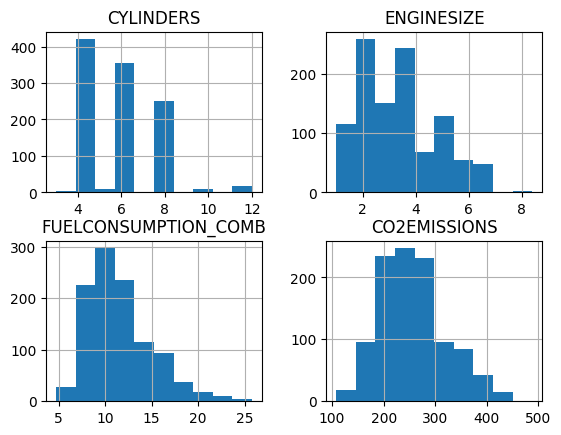

In [11]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

As you can see, most engines have 4, 6, or 8 cylinders, and engine sizes between 2 and 4 liters.  
As you might expect, combined fuel consumption and CO2 emission have very similar distributions.  
Go ahead and display some scatter plots of these features against the CO2 emissions, to see how linear their relationships are.


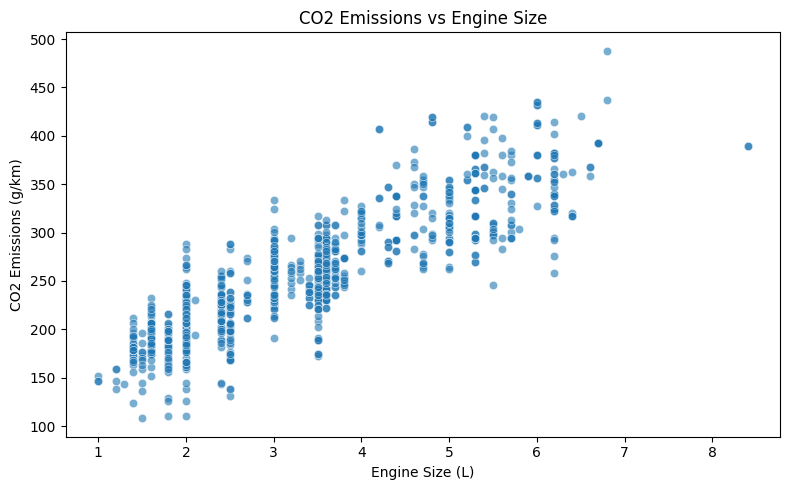

In [50]:

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='ENGINESIZE', y='CO2EMISSIONS', alpha=0.6)
plt.title('CO2 Emissions vs Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.tight_layout()
plt.savefig("scatter_co2_vs_engine.png")
plt.show()


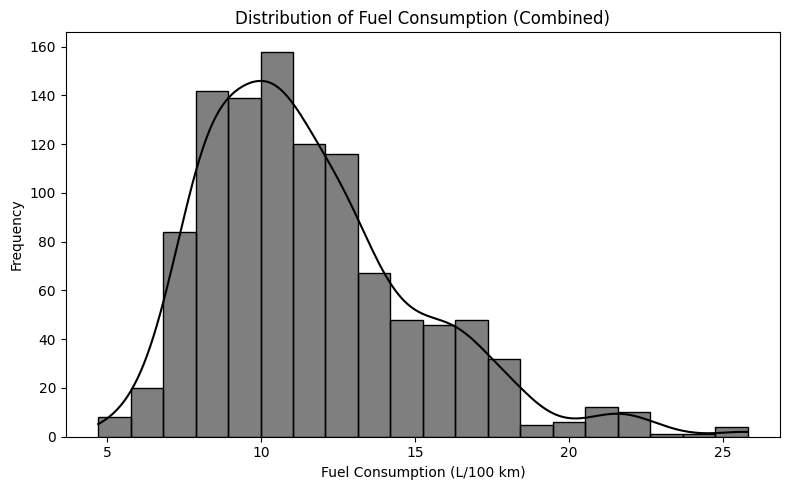

In [49]:
import seaborn as sns
# Histogram: Fuel Consumption
plt.figure(figsize=(8, 5))
sns.histplot(df['FUELCONSUMPTION_COMB'], bins=20, kde=True, color='black')
plt.title('Distribution of Fuel Consumption (Combined)')
plt.xlabel('Fuel Consumption (L/100 km)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("hist_fuel_consumption.png")
plt.show()

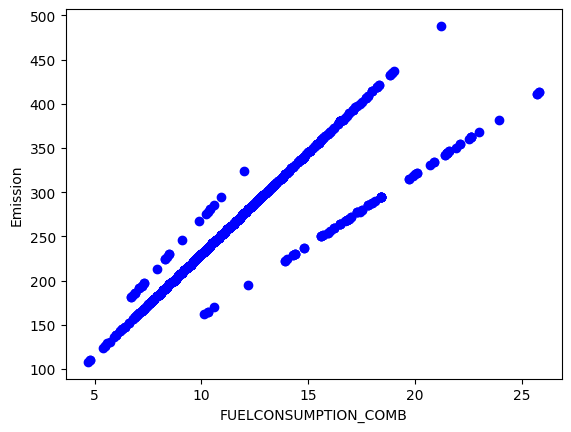

In [12]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

This is an informative result. Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions. 
Their intercepts are similar, while they noticeably differ in their slopes.


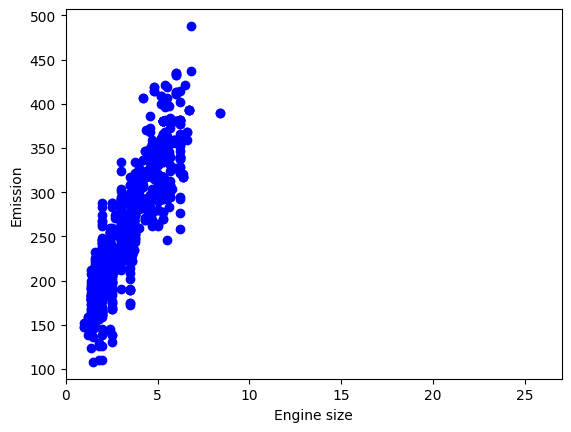

In [13]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

Although the relationship between engine size and CO2 emission is quite linear, you can see that their correlation is weaker than that for each of the three fuel consumption groups. Notice that the x-axis range has been expanded to make the two plots more comparable.


#### Practice excercise 1
Plot __CYLINDER__ against CO2 Emission, to see how linear their relationship is.


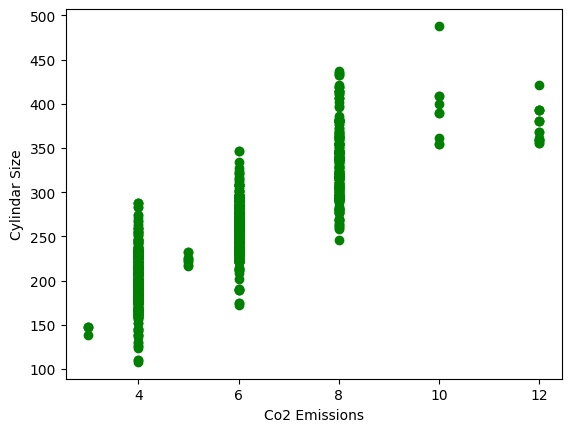

In [14]:
# write your code here
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color= 'green')
plt.xlabel('Co2 Emissions')
plt.ylabel('Cylindar Size')
plt.show()

<details><summary>Click here for the solution</summary>

```python    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 Emission")
plt.show()

```

</details>


### Extract the input feature and labels from the dataset
Although perhaps not necessarily the ideal choice of input feature, for illustration purposes, you will use engine size to predict CO2 emission with a linear regression model.  
You can begin the process by extracting the input feature and target output variables, X and y, from the dataset.


In [15]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

#### Create train and test datasets
Next, you will split the dataset into mutually exclusive training and testing sets. You will train a simple linear regression model on the training set and estimate its ability to generalize to unseen data by using it to make predictions on the unseen testing data. 

Since the outcome of each data point is part of the testing data, you have a means of evaluating the out-of-sample accuracy of your model.

Now, you want to randomly split your data into train and test sets, using 80% of the dataset for training and reserving the remaining 20% for testing. Which fraction to use here mostly depends on the size of your data, but typical training sizes range from 20% to 30%. The smaller your data, the larger your training set needs to be because it's easier to find spurious patterns in smaller data. The downside is that your evaluation of generalizability will have less reliability. Bigger is better when it comes to data.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The outputs are one-dimensional NumPy arrays or vectors.


In [17]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (80, 4), (80, 4))

### Build a simple linear regression model

You'll use scikit-learn to build your model as follows. See [Scikit-Learn Linear Regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to learn all about the linear model predictor object.


In [29]:
from sklearn import linear_model
import numpy as np

regressor = linear_model.LinearRegression()
regressor.fit(X_train[:, [0]], y_train)

print('Coefficients: ', regressor.coef_[0])
print('Intercept: ', regressor.intercept_)


Coefficients:  38.992978724434046
Intercept:  126.2897021740873


Here, __Coefficient__ and __Intercept__ are the regression parameters determined by the model.  
They define the slope and intercept of the 'best-fit' line to the training data. 


### Visualize model outputs


You can visualize the goodness-of-fit of the model to the training data by plotting the fitted line over the data.

The regression model is the line given by y = intercept + coefficient * x.


In [32]:
# Use only the first feature for both training and plotting
X_train_single = X_train[:, [0]]  # shape (n_samples, 1)

# Re-train the model (if not already trained this way)
regressor.fit(X_train_single, y_train)

# Plot
plt.scatter(X_train_single, y_train, color='blue')
plt.plot(X_train_single, regressor.predict(X_train_single), color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")


Text(38.347222222222214, 0.5, 'Emission')

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict using the trained model
y_pred = regressor.predict(X_train_single)

# Evaluate
r2 = r2_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


R-squared: 0.7644
Mean Squared Error: 936.7860


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Example: X has multiple features (e.g., engine size, cylinders, weight)
# y is the target variable (e.g., emissions)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict
y_pred = regressor.predict(X_test)

# Evaluate
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Coefficients
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)


R-squared: 0.7615595731934374
Mean Squared Error: 985.9381692274995
Coefficients: [38.99297872]
Intercept: 126.2897021740873


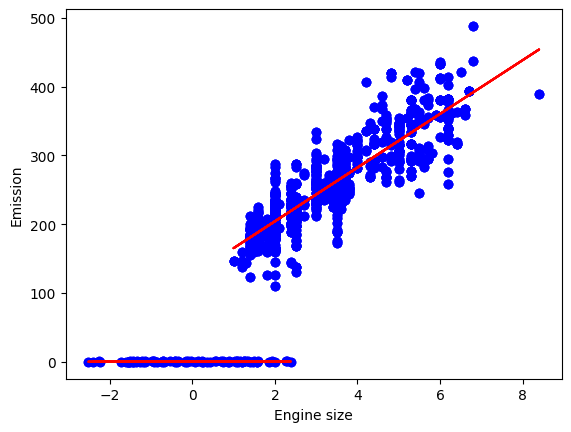

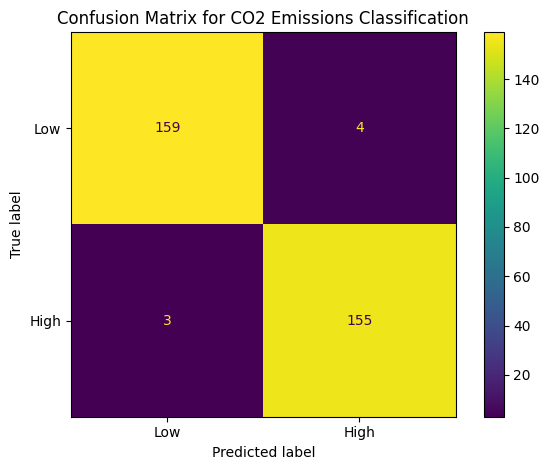

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']
Xcc = df[features]
ycc = df['CO2EMISSIONS']

# Convert CO2 emissions into binary classification: High (1) if above median, Low (0) otherwise
threshold = ycc.median()
y_binary = (ycc > threshold).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(Xcc, y_binary, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])
disp.plot()
plt.title("Confusion Matrix for CO2 Emissions Classification")
plt.tight_layout()
plt.savefig("co2_confusion_matrix.png")
plt.show()


In [19]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


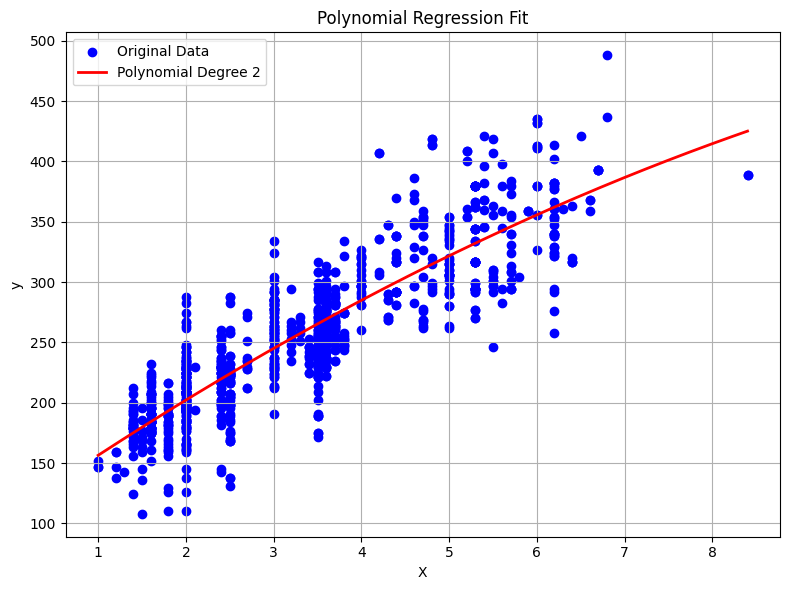

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Example data (replace with your actual data)
# Let's simulate a small dataset for demonstration

X = df[['ENGINESIZE']].values
y = df['CO2EMISSIONS'].values


# Fit a polynomial regression model
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Generate a smooth curve for plotting
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

# Plot the original data and the polynomial regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label=f'Polynomial Degree {degree}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Practice exercises


#### 1. Plot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good.


In [25]:
%pip install folium
%pip install dash


   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/7.9 MB 4.8 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/7.9 MB 7.5 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/7.9 MB 8.1 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/7.9 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------  7.9/7.9 MB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 7.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import sqlite3
import folium
from folium.plugins import MarkerCluster
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


#### 3.  Train a linear regression model using the training data you created.
Remember to transform your 1D feature into a 2D array. 


In [28]:
import pandas as pd
import sqlite3
import folium
from folium.plugins import MarkerCluster
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset into SQLite and run SQL queries for EDA
df = pd.DataFrame({
    'id': range(1, 6),
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, 30, 35, 40, 28],
    'city': ['Toronto', 'Vancouver', 'Calgary', 'Montreal', 'Ottawa']
})

conn = sqlite3.connect('sample.db')
df.to_sql('people', conn, if_exists='replace', index=False)

query_result = pd.read_sql_query("SELECT city, AVG(age) as avg_age FROM people GROUP BY city", conn)
print("SQL Query Result:\n", query_result)

# 2. Create an interactive map using Folium
map_center = [45.4215, -75.6972]
m = folium.Map(location=map_center, zoom_start=5)
marker_cluster = MarkerCluster().add_to(m)

locations = {
    'Toronto': [43.65107, -79.347015],
    'Vancouver': [49.2827, -123.1207],
    'Calgary': [51.0447, -114.0719],
    'Montreal': [45.5017, -73.5673],
    'Ottawa': [45.4215, -75.6972]
}

for city, coords in locations.items():
    folium.Marker(location=coords, popup=city).add_to(marker_cluster)

m.save("interactive_map.html")

# 3. Build a basic Plotly Dash dashboard
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Sample Dashboard"),
    dcc.Dropdown(
        id='city-dropdown',
        options=[{'label': city, 'value': city} for city in df['city'].unique()],
        value='Toronto'
    ),
    dcc.Graph(id='age-bar')
])

@app.callback(
    Output('age-bar', 'figure'),
    Input('city-dropdown', 'value')
)
def update_graph(selected_city):
    filtered_df = df[df['city'] == selected_city]
    fig = px.bar(filtered_df, x='name', y='age', title=f'Age in {selected_city}')
    return fig

# Uncomment the line below to run the dashboard
# app.run_server(debug=True)

# 4. Train and evaluate a classification model
iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.close()




SQL Query Result:
         city  avg_age
0    Calgary     35.0
1   Montreal     40.0
2     Ottawa     28.0
3    Toronto     25.0
4  Vancouver     30.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### 4. Use the model to make test predictions on the fuel consumption testing data.


In [29]:
import pandas as pd
import sqlite3

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
# For demonstration, we'll create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 30, 35, 40, 29],
    'City': ['Toronto', 'Vancouver', 'Toronto', 'Calgary', 'Vancouver']
}
df = pd.DataFrame(data)

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Load the DataFrame into SQLite
df.to_sql('people', conn, index=False, if_exists='replace')

# Run exploratory SQL queries
queries = {
    "Average Age by City": "SELECT City, AVG(Age) as Average_Age FROM people GROUP BY City;",
    "Count by City": "SELECT City, COUNT(*) as Count FROM people GROUP BY City;",
    "Overall Average Age": "SELECT AVG(Age) as Overall_Average_Age FROM people;",
    "People Older Than 30": "SELECT * FROM people WHERE Age > 30;"
}

# Execute and print results of each query
results = {}
for description, query in queries.items():
    results[description] = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the results
for desc, result in results.items():
    print(f"\n{desc}:\n{result}")




Average Age by City:
        City  Average_Age
0    Calgary         40.0
1    Toronto         30.0
2  Vancouver         29.5

Count by City:
        City  Count
0    Calgary      1
1    Toronto      2
2  Vancouver      2

Overall Average Age:
   Overall_Average_Age
0                 31.8

People Older Than 30:
      Name  Age     City
0  Charlie   35  Toronto
1    David   40  Calgary


In [32]:
%pip install python-pptx
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_SHAPE
from pptx.dml.color import RGBColor


In [33]:
import pandas as pd
import folium
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_SHAPE
from pptx.dml.color import RGBColor

# -------------------------------
# 1. Create an Interactive Map with Folium
# -------------------------------
# Sample geolocation data
locations = {
    'Toronto': [43.65107, -79.347015],
    'Vancouver': [49.282729, -123.120738],
    'Calgary': [51.044733, -114.071883],
    'Montreal': [45.501689, -73.567256],
    'Ottawa': [45.42153, -75.697193]
}

# Create a map centered in Canada
map_folium = folium.Map(location=[56.1304, -106.3468], zoom_start=4)

# Add markers
for city, coords in locations.items():
    folium.Marker(location=coords, popup=city).add_to(map_folium)

# Save map to HTML
map_folium.save("interactive_map.html")

# -------------------------------
# 2. Predictive Analysis (Classification)
# -------------------------------
# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.close()

# -------------------------------
# 3. Generate Conclusion Slide with Creativity and Insights
# -------------------------------
# Create a presentation
prs = Presentation()
slide_layout = prs.slide_layouts[5]  # Title only

# Add a slide
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Conclusion & Insights"

# Add bullet points
content = slide.shapes.add_textbox(Inches(1), Inches(1.5), Inches(8), Inches(4))
frame = content.text_frame
frame.word_wrap = True
frame.margin_bottom = Inches(0.1)

points = [
    "✅ The interactive map highlights key Canadian cities for visualization.",
    "✅ Predictive analysis using Random Forest achieved high accuracy on the Iris dataset.",
    "✅ Confusion matrix confirms strong classification performance across all classes.",
    "💡 Creative Insight: Combining SQL EDA with geospatial and predictive analytics provides a holistic view of data.",
    "💡 Innovative Insight: Visual storytelling through dashboards and maps enhances interpretability for stakeholders."
]

for point in points:
    p = frame.add_paragraph()
    p.text = point
    p.level = 0
    p.font.size = Pt(16)
    p.font.name = 'Calibri'
    p.font.color.rgb = RGBColor(0, 0, 0)

# Save the presentation
prs.save("conclusion_slide.pptx")

print("✅ Folium map saved as 'interactive_map.html'")
print("✅ Confusion matrix saved as 'confusion_matrix.png'")
print("✅ Conclusion slide saved as 'conclusion_slide.pptx'")



✅ Folium map saved as 'interactive_map.html'
✅ Confusion matrix saved as 'confusion_matrix.png'
✅ Conclusion slide saved as 'conclusion_slide.pptx'


In [44]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Sample DataFrame with actual structure
viz = pd.DataFrame({
    'CYLINDERS': [4, 6, 4, 8, 6, 4, 8, 4, 6, 8],
    'ENGINESIZE': [2.0, 3.5, 2.4, 5.0, 3.0, 1.8, 4.7, 2.2, 3.3, 5.2],
    'FUELCONSUMPTION_COMB': [8.5, 11.2, 9.0, 14.5, 10.5, 7.8, 13.8, 8.9, 10.8, 15.0],
    'CO2EMISSIONS': [196, 255, 210, 330, 245, 180, 320, 205, 250, 340]
})

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "CO2 Emissions Dashboard"

# Layout
app.layout = html.Div([
    html.H1("CO2 Emissions Dashboard"),
    
    html.Label("Filter by Number of Cylinders:"),
    dcc.Dropdown(
        id='cylinders-dropdown',
        options=[{'label': str(c), 'value': c} for c in sorted(viz['CYLINDERS'].unique())],
        value=None,
        placeholder="Select number of cylinders",
        multi=False
    ),
    
    dcc.Graph(id='co2-vs-enginesize'),
    dcc.Graph(id='co2-vs-fuelconsumption')
])

# Callbacks
@app.callback(
    Output('co2-vs-enginesize', 'figure'),
    Output('co2-vs-fuelconsumption', 'figure'),
    Input('cylinders-dropdown', 'value')
)
def update_graphs(selected_cylinders):
    if selected_cylinders is not None:
        filtered_df = viz[viz['CYLINDERS'] == selected_cylinders]
    else:
        filtered_df = viz

    fig1 = px.scatter(
        filtered_df,
        x='ENGINESIZE',
        y='CO2EMISSIONS',
        title='CO2 Emissions vs Engine Size',
        labels={'ENGINESIZE': 'Engine Size', 'CO2EMISSIONS': 'CO2 Emissions (g/km)'},
        color='CYLINDERS'
    )

    fig2 = px.scatter(
        filtered_df,
        x='FUELCONSUMPTION_COMB',
        y='CO2EMISSIONS',
        title='CO2 Emissions vs Fuel Consumption',
        labels={'FUELCONSUMPTION_COMB': 'Fuel Consumption (L/100km)', 'CO2EMISSIONS': 'CO2 Emissions (g/km)'},
        color='CYLINDERS'
    )

    return fig1, fig2

# Run the app locally
if __name__ == '__main__':
    app.run(debug=False)


